# 초보자

## 초보자를 위한 빠른 시작
https://www.tensorflow.org/tutorials/quickstart/beginner

In [1]:
from tensorflow import keras
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation="relu"),
    Dropout(.2),
    Dense(10, activation="softmax"),
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=[ "accuracy" ]
)

In [3]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4868 - accuracy: 0.8552
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1545 - accuracy: 0.9528
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1124 - accuracy: 0.9663
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0861 - accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0770 - accuracy: 0.9754


In [4]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0697 - accuracy: 0.9777


[0.06967071443796158, 0.9776999950408936]

## 첫 번째 신경망 훈련하기: 기초적인 분류 문제

https://www.tensorflow.org/tutorials/keras/classification

In [5]:
import tensorflow
print(tensorflow.__version__)

2.5.0-dev20201226


In [6]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [8]:
train_images.shape, len(train_labels), train_labels

((60000, 28, 28), 60000, array([9, 0, 0, ..., 3, 0, 5], dtype=uint8))

In [9]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

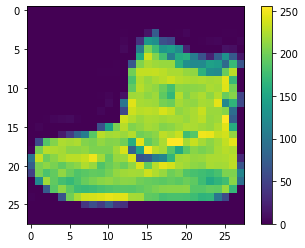

In [10]:
from matplotlib import pyplot
pyplot.figure()
pyplot.imshow(train_images[0])
pyplot.colorbar()
pyplot.grid(False)
pyplot.show()

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

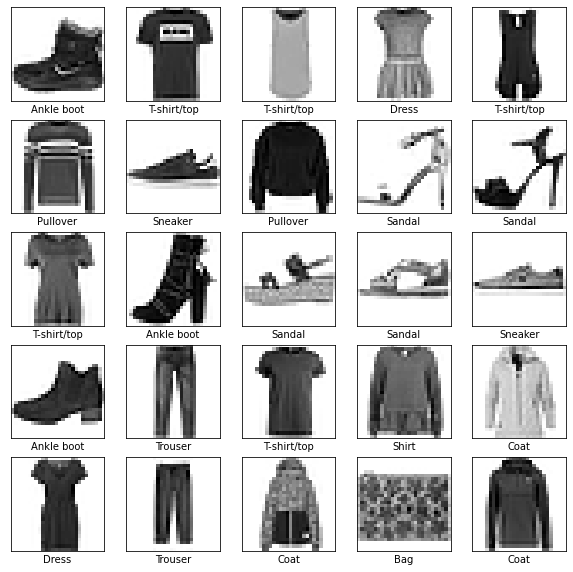

In [12]:
from matplotlib import pyplot
pyplot.figure(figsize=(10, 10))
for i, train_image in enumerate(train_images[:25]):
    pyplot.subplot(5, 5, i + 1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(train_image, cmap=pyplot.cm.binary)
    pyplot.xlabel(class_names[train_labels[i]])
pyplot.show()

In [13]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax"),
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=[ "accuracy" ]
)

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6289 - accuracy: 0.7819
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3885 - accuracy: 0.8595
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3368 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3124 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.8907


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
test_loss, test_acc

313/313 - 0s - loss: 0.3598 - accuracy: 0.8727


(0.35983479022979736, 0.8726999759674072)

In [16]:
predictions = model.predict(test_images)
predictions[0]

array([6.0815012e-07, 1.3995592e-07, 9.7074711e-08, 7.9280973e-09,
       8.3981035e-08, 9.7472686e-04, 1.2304398e-06, 3.5856824e-02,
       5.0779108e-06, 9.6316117e-01], dtype=float32)

In [17]:
import numpy
numpy.argmax(predictions[0]), test_labels[0]

(9, 9)

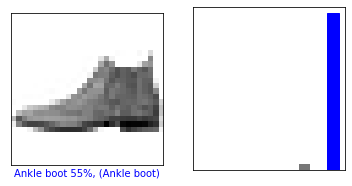

In [18]:
import numpy
from matplotlib import pyplot
pyplot.figure(figsize=(6, 3))
pyplot.subplot(1, 2, 1)
pyplot.grid(False)
pyplot.xticks([])
pyplot.yticks([])
pyplot.imshow(test_images[0], cmap=pyplot.cm.binary)
prediction = numpy.argmax(predictions[0])
prediction_label = class_names[prediction]
percentage = 100 * numpy.max(predictions[12])
test_label = class_names[test_labels[0]]
color = "blue" if prediction == test_labels[0] else "red"
pyplot.xlabel(f'{prediction_label} {percentage:2.0f}%, ({test_label})', color=color)
pyplot.subplot(1, 2, 2)
pyplot.grid(False)
pyplot.xticks([])
pyplot.yticks([])
bar = pyplot.bar(range(len(class_names)), predictions[0], color="#777777")
pyplot.ylim([ 0, 1 ])
bar[prediction].set_color("red")
bar[test_labels[0]].set_color("blue")
pyplot.show()

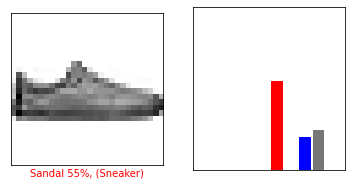

In [19]:
import numpy
from matplotlib import pyplot
pyplot.figure(figsize=(6, 3))
pyplot.subplot(1, 2, 1)
pyplot.grid(False)
pyplot.xticks([])
pyplot.yticks([])
pyplot.imshow(test_images[12], cmap=pyplot.cm.binary)
prediction = numpy.argmax(predictions[12])
prediction_label = class_names[prediction]
percentage = 100 * numpy.max(predictions[12])
test_label = class_names[test_labels[12]]
color = "blue" if prediction == test_labels[12] else "red"
pyplot.xlabel(f'{prediction_label} {percentage:2.0f}%, ({test_label})', color=color)
pyplot.subplot(1, 2, 2)
pyplot.grid(False)
pyplot.xticks([])
pyplot.yticks([])
bar = pyplot.bar(range(len(class_names)), predictions[12], color="#777777")
pyplot.ylim([ 0, 1 ])
bar[prediction].set_color("red")
bar[test_labels[12]].set_color("blue")
pyplot.show()

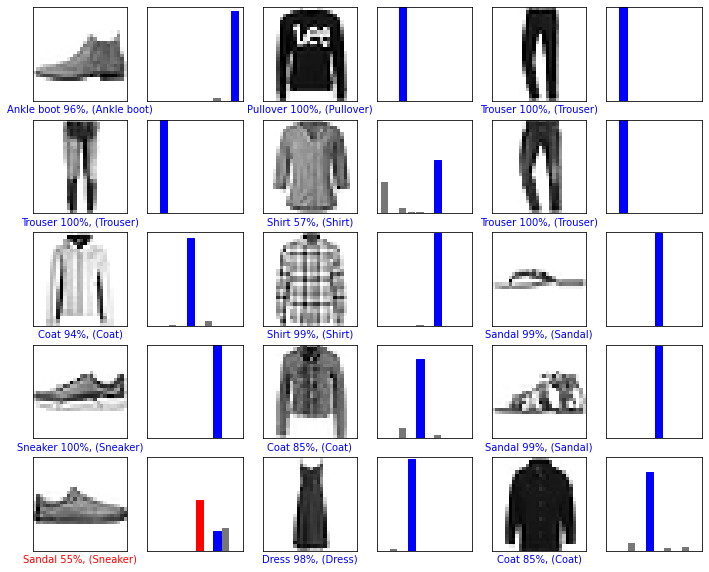

In [20]:
import numpy
from matplotlib import pyplot
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
pyplot.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i, (prediction, test_label_index, test_image) in enumerate(list(zip(predictions, test_labels, test_images))[:num_images]):
    pyplot.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    pyplot.grid(False)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.imshow(test_image, cmap=pyplot.cm.binary)
    prediction_index = numpy.argmax(prediction)
    prediction_label = class_names[prediction_index]
    percentage = 100 * numpy.max(prediction)
    test_label = class_names[test_label_index]
    color = "blue" if prediction_index == test_label_index else "red"
    pyplot.xlabel(f'{prediction_label} {percentage:2.0f}%, ({test_label})', color=color)
    pyplot.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    pyplot.grid(False)
    pyplot.xticks([])
    pyplot.yticks([])
    bar = pyplot.bar(range(len(class_names)), predictions[i], color="#777777")
    pyplot.ylim([ 0, 1 ])
    bar[prediction_index].set_color("red")
    bar[test_label_index].set_color("blue")
pyplot.show()

In [21]:
import numpy
test_image = numpy.expand_dims(test_images[0], 0)
test_image.shape

(1, 28, 28)

In [22]:
predictions_single = model.predict(test_image)
predictions_single

array([[6.0814966e-07, 1.3995540e-07, 9.7074540e-08, 7.9280671e-09,
        8.3980879e-08, 9.7472506e-04, 1.2304376e-06, 3.5856780e-02,
        5.0778922e-06, 9.6316129e-01]], dtype=float32)

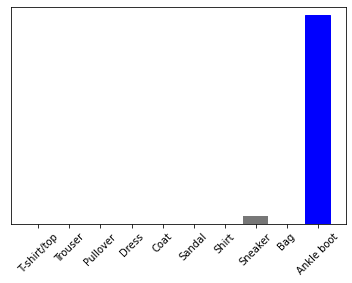

In [23]:
import numpy
pyplot.grid(False)
pyplot.xticks([])
pyplot.yticks([])
bar = pyplot.bar(range(len(class_names)), predictions_single[0], color="#777777")
pyplot.ylim([ 0, 1 ])
prediction_index = numpy.argmax(predictions_single[0])
bar[prediction_index].set_color("red")
bar[test_labels[0]].set_color("blue")
pyplot.xticks(range(len(class_names)), class_names, rotation=45)
None